In [15]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report
import torch
from torchvision import datasets, transforms, models

In [2]:
rann = np.random.random()
print(rann)

0.18598401004759235


In [3]:
# Read image filenames from the dataset folders

data_dir = './raw-img'
class_names0 = os.listdir(data_dir)

class_names=[]
for item in class_names0:
    if '.csv' not in item:
        class_names+=[item]
        
num_class = len(class_names)
image_files = [[os.path.join(data_dir, class_name, x)
               for x in os.listdir(os.path.join(data_dir, class_name))]
               for class_name in class_names]
print(image_files)

[['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', './raw-img\\cane\\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', './raw-img\\cane\\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', './raw-img\\cane\\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', './raw-img\\cane\\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg', './raw-img\\cane\\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.j

In [4]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)
print(image_file_list)

['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', './raw-img\\cane\\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', './raw-img\\cane\\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', './raw-img\\cane\\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', './raw-img\\cane\\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg', './raw-img\\cane\\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jp

In [5]:
image_width, image_height = Image.open(image_file_list[0]).size

print("Total image count:", num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 26179
Image dimensions: 300 x 225
Label names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Label counts: [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


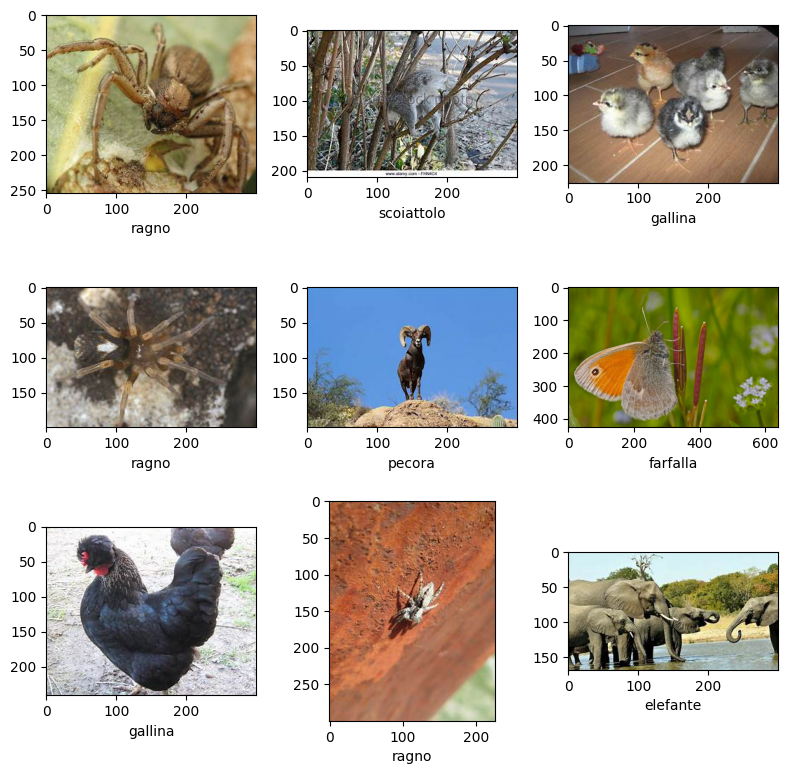

In [6]:
# Visualize some examples

plt.subplots(3, 3, figsize=(8,8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3, 3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [7]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    # Resize the images where the shortest side is 256 pixels, keeping the aspect ratio
    pil_image = Image.open(image)
    width, height = pil_image.size
    aspect_ratio = width / height
    if aspect_ratio > 1:
        pil_image = pil_image.resize((round(aspect_ratio * 256), 256))
    else:
        pil_image = pil_image.resize((256, round(256 / aspect_ratio)))
        
    # Crop out the center 224x224 portion of the image
    width, height = pil_image.size
    new_width = 224
    new_height = 224
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    pil_image = pil_image.crop((round(left), round(top), round(right), round(bottom)))
    
    return pil_image

In [8]:
# Prepare training, validation, and test data lists

valid_frac, test_frac = 0.2, 0.2
trainX, trainY = [], []
valX, valY = [], []
testX, testY = [], []

for i in range(num_total):
    rann = np.random.random()
    if rann < valid_frac:
        valX.append(image_file_list[i])
        valY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_val/{k}/', r))
    elif rann < test_frac + valid_frac:
        testX.append(image_file_list[i])
        testY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_test/{k}/', r))
    else:
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])
        j = image_file_list[i]
        k = j.split('\\')[-2]
        r = j.split('\\')[-1]
        process_image(j).save(os.path.join(f'./animal_train/{k}/', r))
print(len(trainX), len(valX), len(testX))
print(trainX)

15654 5236 5289
['./raw-img\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', './raw-img\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', './raw-img\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', './raw-img\\cane\\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg', './raw-img\\cane\\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg', './raw-img\\cane\\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', './raw-img\\cane\\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg', './raw-img\\cane\\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg', './raw-img\\cane\\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg', './raw-img\\cane\\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg', './raw-img\\cane\\OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jpeg', './raw-img\\cane\\OIP--AzXmxzRD9y3THnVByTtLwHaG5.jpeg', './raw-img\\cane\\OIP--BKXxWj6jk2y8_PQbxmJ0gHaE9.jpeg', './raw-img\\cane\\OIP--BUglHhzleeaUXxOXNbgRQHaEK.jpeg', './raw-img\\cane\\OIP--cyBTQeGHK_bTaYGIDNn7AHaLE.jpeg', './raw-img\\cane\\OIP--DqSseJFuaBH5t89CubEwAHaE8.jpeg', './raw-img\\cane\\OIP--EJV-0S_RAhDQbtUA8HhoAHaGi.jpeg', './raw-img\\cane\\OIP--GnTjiWNoY2Dj

In [7]:
# norm_mean = [0.485, 0.456, 0.406] 
# norm_std = [0.229, 0.224, 0.225] 
train_dir = './animal_train'
val_dir = './animal_val'
test_dir = './animal_test'
batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



# TODO: Load the datasets with imageFolder
image_datasets = {}
image_datasets["train"] = datasets.ImageFolder(root = train_dir, transform=transform)
image_datasets["valid"] = datasets.ImageFolder(root = val_dir, transform=transform)
image_datasets["test"] = datasets.ImageFolder(root = test_dir, transform=transform)

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes

# TODO: Using the image datasets and the transforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(image_datasets["train"], batch_size=batch_size, shuffle = True,
                                          num_workers = 2)
valid_loader = torch.utils.data.DataLoader(image_datasets["valid"], batch_size=batch_size, shuffle = False,
                                          num_workers = 2)
test_loader = torch.utils.data.DataLoader(image_datasets["test"], batch_size=batch_size, shuffle = False,
                                         num_workers = 2)

print(dataset_sizes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

{'train': 15654, 'valid': 5236, 'test': 5289}
cuda:0


In [16]:
import argparse

# TODO: Build and train your network
def prep_model(arch):
    
    vgg16='' 
    alexnet='' 
    densenet161='' 
    
    #Only download the model you need, kill program if one of the three models isn't passed 
    if arch == 'vgg': 
        vgg16 = models.vgg16(pretrained=True) 
        
    elif arch == 'alexnet': 
        alexnet = models.alexnet(pretrained=True) 
        
    elif arch == 'densenet': 
        densenet161 = models.densenet161(pretrained=True) 
        
    else: 
        print('{} architecture not recognized. Supported args: \'vgg\', \'alexnet\', or \'densenet\''.format(arch)) 
        sys.exit() 
    
    
     
    #Pass the model, and grab the input size 
    model_select = {'vgg':vgg16,'alexnet':alexnet,'densenet':densenet161} 
    input_size = {'vgg':25088,'alexnet':9216,'densenet':2208} 
    return model_select[arch], input_size[arch] 
parser = argparse.ArgumentParser()
save_dir = input("Write saved file name: ")
arch = input("Choose one model you like among vgg, alexnet, and densenet?: ")
lr = input("Write learning rate: ")
hiddenunits = input("Write hidden units: ")
e = input("Write training epochs: ")
g = input("Please type gpu ('store_true' or 'store_false'): ")
parser.add_argument('-save_dir', action="store", dest="save_dir")
parser.add_argument('-arch', action="store", dest="arch")
parser.add_argument('-learningrate', action="store", dest="learningrate", type=float)
parser.add_argument('-hiddenunits', action="store", dest="hiddenunits", type=int)
parser.add_argument('-epochs', action="store", dest="epochs", type=int)
parser.add_argument('-gpu', action=g, default=None)
ins=parser.parse_args(['-save_dir', save_dir, '-arch', arch, '-learningrate', lr, '-hiddenunits', hiddenunits, '-epochs', e, '-gpu'])

model_select, input_size = prep_model(ins.arch)

Write saved file name: oh_animals
Choose one model you like among vgg, alexnet, and densenet?: alexnet
Write learning rate: 0.001
Write hidden units: 1024
Write training epochs: 5
Please type gpu ('store_true' or 'store_false'): store_true


In [17]:
from collections import OrderedDict
import torch.nn as nn

for param in model_select.parameters():
    param.requires_grad = False

# and final output 10, since tht we have 10 kinds of animals. 
classifier = nn.Sequential(OrderedDict([     
                          ('dropout1', nn.Dropout(0.1)),
                          ('fc1', nn.Linear(input_size, ins.hiddenunits)), 
                          ('relu1', nn.ReLU()),
                          ('dropout2', nn.Dropout(0.1)),
                          ('fc2', nn.Linear(ins.hiddenunits, 10)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

# Replace model's old classifier with the new classifier
model_select.classifier = classifier
classifier

Sequential(
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (relu1): ReLU()
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (output): LogSoftmax(dim=1)
)

In [94]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [18]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

True


In [19]:
import torch.optim as optim

criterion = nn.NLLLoss()

optimizer = optim.Adam(model_select.classifier.parameters(), lr = ins.learningrate)
model_select.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (dropout1): Dropout(p=0.1, inplace=False)
    (fc1): Linear(in_features=9216, out_features=1024, bia

In [22]:
from torch.autograd import Variable

num_epochs = 5
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

# Training
for epoch in range(num_epochs):
    # Reset variables at 0 epoch
    correct=0
    iteration=0
    iter_loss=0.0
  
    model_select.train() # Training Mode
  
    for i,(inputs,labels) in enumerate(train_loader):
    
        inputs=Variable(inputs)
        labels=Variable(labels)
        #print(labels.size())
        # if CUDA is avaible, shift to GPU (CUDA)
        CUDA=torch.cuda.is_available()
        if CUDA:
            inputs=inputs.cuda()
            labels=labels.cuda()

        optimizer.zero_grad() # clear gradient
        outputs=model_select(inputs)
        loss=criterion(outputs,labels)
        iter_loss += loss.item() # Accumulate loss
        loss.backward() # backpropagation
        optimizer.step() # update weights

        # Save the correct predictions for training data
        _,predicted=torch.max(outputs,1)
        correct +=(predicted==labels).sum()
        iteration +=1
    
    train_loss.append(iter_loss/iteration)
    train_accuracy.append((100*correct/len(image_datasets["train"])))
  
    # Testing
    correct=0
    iteration=0
    testing_loss=0.0
  
    model_select.eval()  # Testing Mode
  
    for i, (inputs, labels) in enumerate(test_loader):
    
        inputs=Variable(inputs)
        labels=Variable(labels)

        CUDA=torch.cuda.is_available()
        if CUDA:
            inputs=inputs.cuda()
            labels=labels.cuda()
        with torch.no_grad():
            outputs=model_select(inputs)
            loss=criterion(outputs,labels)
            testing_loss += loss.item()

            _,predicted=torch.max(outputs,1)
            correct+=(predicted==labels).sum()

            iteration+=1  
    
    test_loss.append(testing_loss/iteration)
    test_accuracy.append((100*correct/len(image_datasets["test"])))
  
    print('Epoch {}/{}, Training Loss:{:.3f}, Training Accuracy:{:.3f}, Testing Loss {:.3f}, Testing Accuracy:{:.3f}'
       .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

Epoch 1/5, Training Loss:0.745, Training Accuracy:77.443, Testing Loss 0.525, Testing Accuracy:83.759
Epoch 2/5, Training Loss:0.476, Training Accuracy:85.901, Testing Loss 0.547, Testing Accuracy:84.061
Epoch 3/5, Training Loss:0.355, Training Accuracy:89.357, Testing Loss 0.551, Testing Accuracy:86.670
Epoch 4/5, Training Loss:0.297, Training Accuracy:91.421, Testing Loss 0.575, Testing Accuracy:86.349
Epoch 5/5, Training Loss:0.271, Training Accuracy:92.385, Testing Loss 0.716, Testing Accuracy:87.162


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

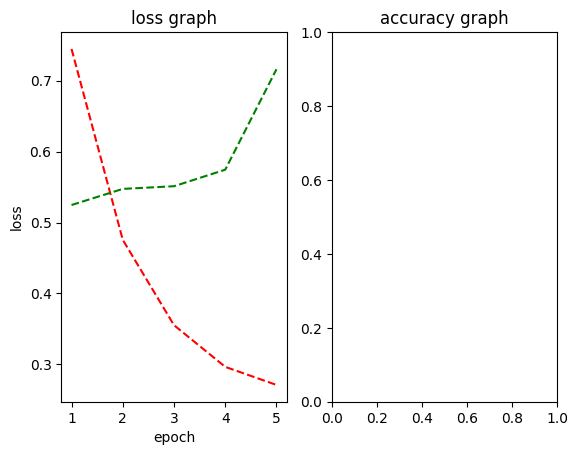

In [23]:
x = np.arange(1, 6, 1) 
ax1 = plt.subplot(1, 2, 1)
plt.title('loss graph')
plt.plot(x, train_loss, 'r--', x, test_loss, 'g--')
plt.xlabel('epoch')
plt.ylabel('loss')
ax2 = plt.subplot(1, 2, 2)
plt.title('accuracy graph')
plt.plot(x, train_accuracy, 'r--', x, test_accuracy, 'g--')
plt.xlabel('epoch')
plt.ylabel('accuracy') 

In [24]:
# TODO: Save the checkpoint
model_select.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {'input_size': input_size,
              'output_size': num_class,
              'epochs': ins.epochs,
              'batch_size': batch_size,
              'model_select': model_select,
              'classifier': classifier,
              'optimizer': optimizer.state_dict(),
              'state_dict': model_select.state_dict(),
              'class_to_idx': model_select.class_to_idx
             }

torch.save(checkpoint, 'animal_checkpoint2.pth')

In [25]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model_select = checkpoint["model_select"]
    model_select.classifier = checkpoint['classifier']
    model_select.load_state_dict(checkpoint['state_dict'])
    model_select.class_to_idx = checkpoint['class_to_idx']
    optimizer = checkpoint['optimizer']
    epochs = checkpoint['epochs']
    
    for param in model_select.parameters():
        param.requires_grad = False
        
    return model_select, checkpoint['class_to_idx']

In [26]:
model_select, class_to_idx = load_checkpoint("animal_checkpoint2.pth")

In [27]:
def process_image2(image):
    ''' Scales, crops, and normalize a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    preprocess1 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224)
    ])
    
    preprocess2 = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    image = preprocess1(image)
    plt.imshow(image)
    image = preprocess2(image)
    
    return image

In [28]:
import torch.nn.functional as F

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # TODO: Implement the code to predict the class from an image file
    img = Image.open(image_path)
    img = process_image2(img)
    
    # Convert 2D image to 1D vector
    img = np.expand_dims(img, axis=0)
    
    img = torch.from_numpy(img)
    
    model.eval()
    inputs = Variable(img).to(device)
    logits = model.forward(inputs)
    
    ps = F.softmax(logits,dim=1)
    topk = ps.cpu().topk(topk)
    
    return (e.data.numpy().squeeze().tolist() for e in topk)

prob:  1.0
class:  spider


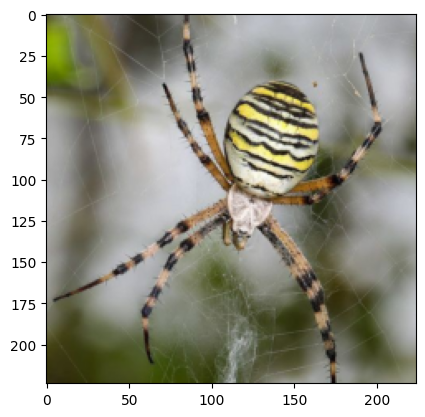

In [36]:
image_path = "./spider.jpg"
probs, classes = predict(image_path, model_select.to(device))
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
#trans_reverse = {v:k for k, v in translate.items()}
print("prob: ", probs[0])
print("class: ", translate[class_names[classes[0]]])